In [14]:
##Based losely on: https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/

In [1]:
import keras
from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np
import pylab as plt
import scipy.stats as stats
import pandas as pd
import os
from PIL import Image
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
from resizeimage import resizeimage


from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

import math, json, sys

from keras.callbacks import EarlyStopping, ModelCheckpoint
import random



/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [57]:
curr_dir=os.getcwd()
df = pd.read_csv(curr_dir+'/data/combined.csv')

In [58]:

images_loaded=2000 #There are 2000 images in total
#size=(64, 64)
size=(224, 224)



In [4]:
#credits: https://github.com/python-pillow/Pillow/issues/835#issuecomment-331670254
def get_images(curr_dir, data_dir):
    images=[]
    names=[]
    valid_images = [".jpg"]#,".gif",".png",".tga"]
    index=0
    current=curr_dir+data_dir
    print(current)
    for f in os.listdir(current):
        #temp=os.path.join(curr_dir,'/temp/')
        temp=curr_dir+'/data/small/'
        if index>images_loaded:
            break
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        #x=np.array(Image.open(os.path.join(curr_dir,f)))
        #x=Image.open(os.path.join(current,f))
        try:
            #x=Image.open(current+f)
            x=Image.open(os.path.join(current,f))
            x.thumbnail(size, Image.ANTIALIAS)
            #im.save(outfile, "JPEG")
            
            x.save(os.path.join(temp,f))#,"JPEG")
            images.append(np.array(x))
            names.append(f)
            index+=1
        except IOError:
            print("smaller image not created for '%s'" % f)
        
        #print(x)
        #t=x.copy()
        #images.append(t.thumbnail((9,9,3)))
        #x.close()
        #plt.hist(images[0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    return images, names

In [5]:
images, names = get_images(curr_dir, '/data/ISIC-2017_Training_Data/')
#print('Image size: %s' %([images[1].shape]))
#images[0].reshape(9,9)
#type(images[0])
    #thumbs[n].thumbnail((300, 300))
#img = Image.fromarray(images[0], 'RGB')
#img.save(curr_dir+'/temp/my.jpg')
#img.close()
#img=Image.open(curr_dir+'/temp/my.jpg')
#img.show()

/Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/ISIC-2017_Training_Data/


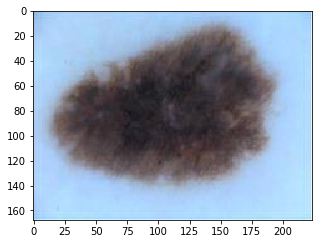

In [6]:
im1 = imread(curr_dir+'/data/small/ISIC_0000000.jpg')
fig = plt.figure(0,(5,10))
plt.imshow(im1)


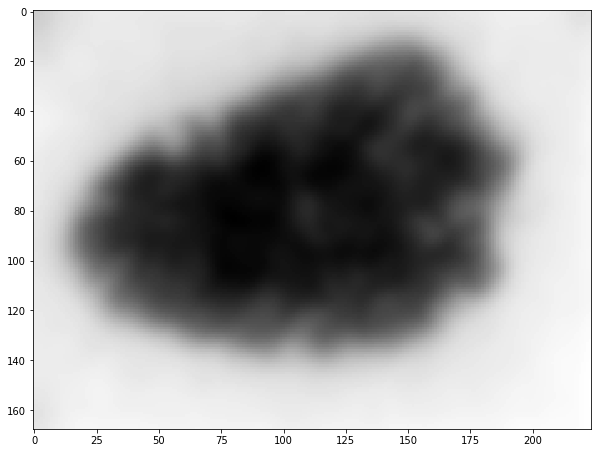

In [7]:
gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
gray_1 = cv2.GaussianBlur(gray_1, ksize=(29,29), sigmaX=3)
fig = plt.figure(0,(10,10))
plt.imshow(gray_1, cmap='gray')
#plt.imshow(im1)

Corners shape:  (168, 224)


True

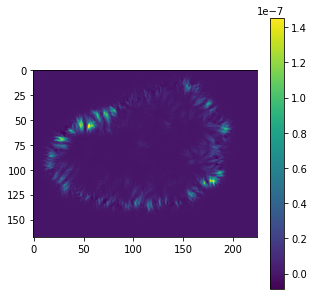

In [8]:
corners=cv2.cornerHarris(gray_1, blockSize=3, ksize=3, k=0.0004)
print('Corners shape: ', corners.shape)
fig = plt.figure(0,(5,5))
plt.imshow(corners)
plt.colorbar()
cv2.imwrite(curr_dir+'/temp/my.jpg',corners)

In [9]:
#plt.hist(images[0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
#im1 = Image.open(curr_dir+'/data/ISIC-2017_Training_Data/ISIC_0000000.jpg')
#im1=im1.thumbnail((64, 64))#, Image.ANTIALIAS)


(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 224, 3)
(168, 

(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(149, 224, 3)
(148, 224, 3)
(148, 224, 3)
(149, 224, 3)
(148, 224, 3)
(149, 224, 3)
(149, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(149, 224, 3)
(149, 224, 3)
(149, 224, 3)
(148, 224, 3)
(148, 224, 3)
(149, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 224, 3)
(148, 

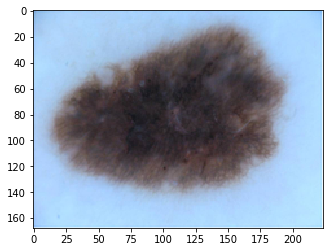

In [10]:
imgplot = plt.imshow(images[0])
#plt.show(imgplot)
#Padding images to 64x64

for i in images:
    print(i.shape)

In [11]:
#credit to https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
def padding_images():
    m = cv2.imread(im_pth)
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
    value=color)
    cv2.imshow("image", new_im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [12]:
def crop_imageto_size(x_size, y_size, curr_dir, data_dir='/data/small/'):
    #with open('test-image.jpeg', 'r+b') as f:
    #    with Image.open(f) as image:
            
    #        cover.save('test-image-cover.jpeg', image.format)
    images=[]
    
    valid_images = [".jpg"]#,".gif",".png",".tga"]
    current=curr_dir+data_dir
    for f in os.listdir(current):
        #temp=os.path.join(curr_dir,'/temp/')
        temp=curr_dir+'/data/small/'

        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        #x=np.array(Image.open(os.path.join(curr_dir,f)))
        #x=Image.open(os.path.join(current,f))
        try:
            #x=Image.open(current+f)
            x=Image.open(os.path.join(current,f))
            x = resizeimage.resize_cover(x, [x_size, y_size])
            #im.save(outfile, "JPEG")
            
            x.save(os.path.join(temp,f),x.format)
            images.append(np.array(x))
        except IOError:
            print("smaller image not created for '%s'" % f)
    return images

In [13]:
#images=crop_imageto_size(64,48, curr_dir)
images=crop_imageto_size(224,224, curr_dir)
for i in images:
    print(i.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [14]:
#gray_1 = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
#gray_1 = cv2.GaussianBlur(gray_1, ksize=(29,29), sigmaX=3)
#plt.hist(images[0].ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
#plt.hist(gray_1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In [15]:
names[:3]

['ISIC_0000000.jpg', 'ISIC_0000001.jpg', 'ISIC_0000002.jpg']

In [16]:
#X=np.array()
#type(images)
images[0].shape


(224, 224, 3)

In [17]:
df = df[['image_id','age_approximate', 'sex', 'melanoma', 'seborrheic_keratosis']]
df.head(3)

,image_id,age_approximate,sex,melanoma,seborrheic_keratosis
0,ISIC_0000000,55,0,0.0,0.0
1,ISIC_0000001,30,0,0.0,0.0
2,ISIC_0000002,60,0,1.0,0.0


In [33]:
def move_images(destination, df):
    current=curr_dir+'/data/small/'
    print(current)
    print(destination)
    #print(df.image_id)
    #for f in os.listdir(current):
    for f in df.image_id:
        #temp=os.path.join(curr_dir,'/temp/')
        f=f+'.jpg'
        print(f)
        #x=np.array(Image.open(os.path.join(curr_dir,f)))
        #x=Image.open(os.path.join(current,f))
        try:
            #x=Image.open(current+f)
            x=Image.open(os.path.join(current,f))
            #im.save(outfile, "JPEG")
            
            x.save(os.path.join(destination,f))#,"JPEG")
        except IOError:
            print("smaller image not created for '%s'" % f)

In [36]:
def segregate_data():
    malign=df.loc[df.melanoma==1]
    benign=df.loc[df.melanoma==0]
    nMal=malign.shape[0]#nr malign
    nBen=benign.shape[0]
    train_malign, validation_malign, test_malign = np.split(malign.sample(frac=1), [int(.7*len(malign)), int(.8*len(malign))])
    train_benign, validation_benign, test_benign = np.split(benign.sample(frac=1), [int(.7*len(benign)), int(.8*len(benign))])
    print(train_benign.shape, validation_benign.shape, test_benign.shape)
    direct = ['/data/small/test/benign/','/data/small/test/malign/',
              '/data/small/train/benign/','/data/small/train/malign/',
              '/data/small/validation/benign/','/data/small/validation/malign/',
             ]
    
    move_images(curr_dir+direct[0], test_benign)
    move_images(curr_dir+direct[1],test_malign)
    move_images(curr_dir+direct[2],train_benign)
    move_images(curr_dir+direct[3], train_malign)
    move_images(curr_dir+direct[4],validation_benign)
    move_images(curr_dir+direct[5],validation_malign)
    
        

In [38]:
segregate_data()

(1138, 5) (162, 5) (326, 5)
/Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/
/Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/test/benign/
ISIC_0000203.jpg
ISIC_0011292.jpg
ISIC_0012844.jpg
ISIC_0010492.jpg
ISIC_0000250.jpg
ISIC_0000198.jpg
ISIC_0002829.jpg
ISIC_0000235.jpg
ISIC_0012155.jpg
ISIC_0013516.jpg
ISIC_0014114.jpg
ISIC_0010053.jpg
ISIC_0000089.jpg
ISIC_0000451.jpg
ISIC_0013796.jpg
ISIC_0014031.jpg
ISIC_0013311.jpg
ISIC_0013492.jpg
ISIC_0011097.jpg
ISIC_0010475.jpg
ISIC_0010178.jpg
ISIC_0000223.jpg
ISIC_0013187.jpg
ISIC_0011328.jpg
ISIC_0010219.jpg
ISIC_0013306.jpg
ISIC_0000119.jpg
ISIC_0013798.jpg
ISIC_0011402.jpg
ISIC_0013166.jpg
ISIC_0013092.jpg
ISIC_0014537.jpg
ISIC_0014903.jpg
ISIC_0010452.jpg
ISIC_0010032.jpg
ISIC_0011123.jpg
ISIC_0013480.jpg
ISIC_0012342.jpg
ISIC_0014682.jpg
ISIC_0009947.jpg
ISIC_0014594.jpg
ISIC_0014526.jpg
ISIC_0012725.jpg
ISIC_0013802.jpg
ISIC_0000135.jpg
ISIC_0013205.jpg
ISIC_0013140.jpg
ISIC_0013942.jpg
ISIC_0010206

ISIC_0013294.jpg
ISIC_0014089.jpg
ISIC_0010467.jpg
ISIC_0013782.jpg
ISIC_0009974.jpg
ISIC_0012873.jpg
ISIC_0010077.jpg
ISIC_0012957.jpg
ISIC_0009160.jpg
ISIC_0014730.jpg
ISIC_0010573.jpg
ISIC_0000109.jpg
ISIC_0012526.jpg
ISIC_0011347.jpg
ISIC_0013595.jpg
ISIC_0000006.jpg
ISIC_0014908.jpg
ISIC_0009188.jpg
ISIC_0000181.jpg
ISIC_0000024.jpg
ISIC_0011336.jpg
ISIC_0000021.jpg
ISIC_0010474.jpg
ISIC_0013040.jpg
ISIC_0011207.jpg
ISIC_0013383.jpg
ISIC_0012141.jpg
ISIC_0000258.jpg
ISIC_0000037.jpg
ISIC_0002780.jpg
ISIC_0012508.jpg
ISIC_0013001.jpg
ISIC_0000317.jpg
ISIC_0011159.jpg
ISIC_0009911.jpg
ISIC_0014026.jpg
ISIC_0013765.jpg
ISIC_0014716.jpg
ISIC_0013310.jpg
ISIC_0005666.jpg
ISIC_0013112.jpg
ISIC_0002476.jpg
ISIC_0012135.jpg
ISIC_0011205.jpg
ISIC_0014591.jpg
ISIC_0000380.jpg
ISIC_0010326.jpg
ISIC_0012303.jpg
ISIC_0013526.jpg
ISIC_0000219.jpg
ISIC_0012187.jpg
ISIC_0013333.jpg
ISIC_0000081.jpg
ISIC_0013424.jpg
ISIC_0000336.jpg
ISIC_0013118.jpg
ISIC_0000427.jpg
ISIC_0013238.jpg
ISIC_0013248.j

ISIC_0009583.jpg
ISIC_0013400.jpg
ISIC_0013689.jpg
ISIC_0013982.jpg
ISIC_0013039.jpg
ISIC_0014606.jpg
ISIC_0014599.jpg
ISIC_0010205.jpg
ISIC_0013087.jpg
ISIC_0014577.jpg
ISIC_0013208.jpg
ISIC_0015113.jpg
ISIC_0011345.jpg
ISIC_0014915.jpg
ISIC_0012516.jpg
ISIC_0012228.jpg
ISIC_0010371.jpg
ISIC_0003346.jpg
ISIC_0013196.jpg
ISIC_0013356.jpg
ISIC_0009963.jpg
ISIC_0003308.jpg
ISIC_0010607.jpg
ISIC_0000494.jpg
ISIC_0014394.jpg
ISIC_0007693.jpg
ISIC_0010105.jpg
ISIC_0012785.jpg
ISIC_0013800.jpg
ISIC_0000330.jpg
ISIC_0000358.jpg
ISIC_0010449.jpg
ISIC_0000527.jpg
ISIC_0011227.jpg
ISIC_0000112.jpg
ISIC_0002453.jpg
ISIC_0000107.jpg
ISIC_0007322.jpg
ISIC_0013553.jpg
ISIC_0013603.jpg
ISIC_0012378.jpg
ISIC_0000326.jpg
ISIC_0009966.jpg
ISIC_0013929.jpg
ISIC_0000388.jpg
ISIC_0000328.jpg
ISIC_0012889.jpg
ISIC_0012827.jpg
ISIC_0010856.jpg
ISIC_0012521.jpg
ISIC_0000236.jpg
ISIC_0012804.jpg
ISIC_0000467.jpg
ISIC_0000100.jpg
ISIC_0000504.jpg
ISIC_0013670.jpg
ISIC_0012981.jpg
ISIC_0010339.jpg
ISIC_0000128.j

ISIC_0009430.jpg
ISIC_0014699.jpg
ISIC_0000366.jpg
ISIC_0009954.jpg
ISIC_0013430.jpg
ISIC_0010442.jpg
ISIC_0013778.jpg
ISIC_0013676.jpg
ISIC_0012325.jpg
ISIC_0014515.jpg
ISIC_0014093.jpg
ISIC_0000471.jpg
ISIC_0010093.jpg
ISIC_0000237.jpg
ISIC_0010846.jpg
ISIC_0014498.jpg
ISIC_0013053.jpg
ISIC_0013667.jpg
ISIC_0013876.jpg
ISIC_0000101.jpg
ISIC_0010497.jpg
ISIC_0014216.jpg
ISIC_0015181.jpg
ISIC_0004115.jpg
ISIC_0010367.jpg
ISIC_0012539.jpg
ISIC_0000113.jpg
ISIC_0000239.jpg
ISIC_0014615.jpg
ISIC_0014651.jpg
ISIC_0013341.jpg
ISIC_0012452.jpg
ISIC_0000480.jpg
ISIC_0000269.jpg
ISIC_0010348.jpg
ISIC_0010574.jpg
ISIC_0009917.jpg
ISIC_0000202.jpg
ISIC_0000409.jpg
ISIC_0012263.jpg
ISIC_0012902.jpg
ISIC_0012932.jpg
ISIC_0012704.jpg
ISIC_0011211.jpg
ISIC_0012676.jpg
ISIC_0012945.jpg
ISIC_0014825.jpg
ISIC_0013075.jpg
ISIC_0013155.jpg
ISIC_0014440.jpg
ISIC_0000486.jpg
ISIC_0011170.jpg
ISIC_0014441.jpg
ISIC_0000370.jpg
ISIC_0000069.jpg
ISIC_0009901.jpg
ISIC_0014625.jpg
ISIC_0011339.jpg
ISIC_0002673.j

ISIC_0000122.jpg
ISIC_0009914.jpg
ISIC_0014433.jpg
ISIC_0009998.jpg
ISIC_0012311.jpg
ISIC_0009888.jpg
ISIC_0013326.jpg
ISIC_0014529.jpg
ISIC_0014685.jpg
ISIC_0009951.jpg
ISIC_0008207.jpg
/Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/
/Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/validation/malign/
ISIC_0010591.jpg
ISIC_0010029.jpg
ISIC_0014361.jpg
ISIC_0014183.jpg
ISIC_0001128.jpg
ISIC_0001152.jpg
ISIC_0011163.jpg
ISIC_0000298.jpg
ISIC_0011126.jpg
ISIC_0010094.jpg
ISIC_0014372.jpg
ISIC_0000301.jpg
ISIC_0012290.jpg
ISIC_0013525.jpg
ISIC_0015166.jpg
ISIC_0000162.jpg
ISIC_0014545.jpg
ISIC_0013610.jpg
ISIC_0014099.jpg
ISIC_0013986.jpg
ISIC_0000294.jpg
ISIC_0013865.jpg
ISIC_0000521.jpg
ISIC_0010011.jpg
ISIC_0014144.jpg
ISIC_0014289.jpg
ISIC_0000288.jpg
ISIC_0013258.jpg
ISIC_0010016.jpg
ISIC_0000412.jpg
ISIC_0012715.jpg
ISIC_0000533.jpg
ISIC_0013334.jpg
ISIC_0011166.jpg
ISIC_0000036.jpg
ISIC_0000139.jpg
ISIC_0000164.jpg
ISIC_0014088.jpg


In [39]:
malign=df.loc[df.melanoma==1]
benign=df.loc[df.melanoma==0]
malign.head(2)
print('Number malign samples:',malign.shape)
print('Number benign samples:',benign.shape)

Number malign samples: (374, 5)
Number benign samples: (1626, 5)


In [40]:
DATA_DIR = curr_dir+'/data/small/'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
VALID_DIR = os.path.join(DATA_DIR, 'validation')
SIZE = (224, 224)
BATCH_SIZE = 16
    
num_train_samples = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
num_valid_samples = sum([len(files) for r, d, files in os.walk(VALID_DIR)])

num_train_steps = math.floor(num_train_samples/BATCH_SIZE)
num_valid_steps = math.floor(num_valid_samples/BATCH_SIZE)

gen = keras.preprocessing.image.ImageDataGenerator()
val_gen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

batches = gen.flow_from_directory(TRAIN_DIR, target_size=SIZE, class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)
val_batches = val_gen.flow_from_directory(VALID_DIR, target_size=SIZE, class_mode='categorical', shuffle=True, batch_size=BATCH_SIZE)

model = keras.applications.resnet50.ResNet50()

classes = list(iter(batches.class_indices))
model.layers.pop()
for layer in model.layers:
    layer.trainable=False
last = model.layers[-1].output
x = Dense(len(classes), activation="softmax")(last)
finetuned_model = Model(model.input, x)
finetuned_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
for c in batches.class_indices:
    classes[batches.class_indices[c]] = c
finetuned_model.classes = classes

early_stopping = EarlyStopping(patience=10)
checkpointer = ModelCheckpoint('resnet50_best.h5', verbose=1, save_best_only=True)

finetuned_model.fit_generator(batches, steps_per_epoch=num_train_steps, epochs=10, callbacks=[early_stopping, checkpointer], validation_data=val_batches, validation_steps=num_valid_steps)
finetuned_model.save('resnet50_final.h5')

Found 1399 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
87/87 [==============================] - 341s 4s/step - loss: 0.5502 - acc: 0.7692 - val_loss: 0.5995 - val_acc: 0.7344

Epoch 00001: val_loss improved from inf to 0.59945, saving model to resnet50_best.h5
Epoch 2/10
87/87 [==============================] - 337s 4s/step - loss: 0.4921 - acc: 0.8060 - val_loss: 0.5502 - val_acc: 0.7552

Epoch 00002: val_loss improved from 0.59945 to 0.55019, saving model to resnet50_best.h5
Epoch 3/10
87/87 [==============================] - 337s 4s/step - loss: 0.4585 - acc: 0.8103 - val_loss: 0.5685 - val_acc: 0.7396

Epoch 00003: val_loss did not improve
Epoch 4/10
87/87 [==============================] - 355s 4s/step - loss: 0.4453 - acc: 0.8119 - val_loss: 0.5226 - val_acc: 0.7708

Epoch 00004: val_loss improved from 0.55019 to 0.52262, saving model to resnet50_best.h5
Epoch 5/10
87/87 [==============================] - 352s 4s/step - loss: 0.4405 - acc: 0

In [51]:
batch_size = 50
num_classes = 2

base_model = resnet50.ResNet50
#base_model = inception_v3.InceptionV3
#base_model = vgg16.VGG16

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='relu')(x)#1024
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [61]:
#x_train = np.random.normal(loc=127, scale=127, size=(50, 224,224,3))
x_train=np.array(images)
y_train =np.array([x for x in df.melanoma])
#x_train=preprocess_input(images[0])
#y_train = np.array([0,1]*25)
#x_train = resnet50.preprocess_input(x_train)
#img = image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
type(np.array(images))

numpy.ndarray

In [62]:
x_train.shape
#y_train.shape
#pd.DataFrame([x_train], [y_train])

(2000, 224, 224, 3)

In [63]:
np.max(x_train)

255

In [65]:
#early_stopping = EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('resnet50_best.h5', verbose=1, save_best_only=True)
type(y_train)
y_train

array([0., 0., 1., ..., 0., 1., 0.])

In [66]:
print(model.evaluate(x_train, y_train, batch_size=batch_size, verbose=1))

[0.898239879310131, 0.23399999979883432]


In [14]:
#model.load_weights('model.h5')

In [69]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,image_id,age_approximate,sex,melanoma,seborrheic_keratosis
0,0,0,ISIC_0000000,55,0,0.0,0.0
1,1,1,ISIC_0000001,30,0,0.0,0.0
2,2,2,ISIC_0000002,60,0,1.0,0.0
3,3,3,ISIC_0000003,30,1,0.0,0.0
4,4,4,ISIC_0000004,80,1,1.0,0.0
5,5,5,ISIC_0000006,25,0,0.0,0.0
6,6,6,ISIC_0000007,25,0,0.0,0.0
7,7,7,ISIC_0000008,30,0,0.0,0.0
8,8,8,ISIC_0000009,30,0,0.0,0.0
9,9,9,ISIC_0000010,35,0,0.0,0.0


In [70]:
history = model.fit(x_train, y_train,
          epochs=20,
          batch_size=batch_size,
          shuffle=False,
          validation_data=(x_train, y_train))#epochs=100



Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 987s 493ms/step - loss: 0.5343 - acc: 0.7895 - val_loss: 0.5364 - val_acc: 0.7965
Epoch 2/20
2000/2000 [==============================] - 952s 476ms/step - loss: 0.5021 - acc: 0.8125 - val_loss: 0.5404 - val_acc: 0.7880
Epoch 3/20
2000/2000 [==============================] - 949s 474ms/step - loss: 0.4874 - acc: 0.8135 - val_loss: 0.5276 - val_acc: 0.7915
Epoch 4/20
2000/2000 [==============================] - 948s 474ms/step - loss: 0.4783 - acc: 0.8135 - val_loss: 0.5202 - val_acc: 0.7890
Epoch 5/20
2000/2000 [==============================] - 947s 473ms/step - loss: 0.4702 - acc: 0.8135 - val_loss: 0.5157 - val_acc: 0.7855
Epoch 6/20
2000/2000 [==============================] - 944s 472ms/step - loss: 0.4628 - acc: 0.8140 - val_loss: 0.5105 - val_acc: 0.7855
Epoch 7/20
2000/2000 [==============================] - 944s 472ms/step - loss: 0.4560 - acc: 0.8150 - val_loss: 0.5084 - va

In [71]:
model.save_weights('model.h5')
print(model.evaluate(x_train, y_train, batch_size=batch_size, verbose=1))

2000/2000 [==============================] - 542s 271ms/step
[0.4947653792798519, 0.7575000002980232]


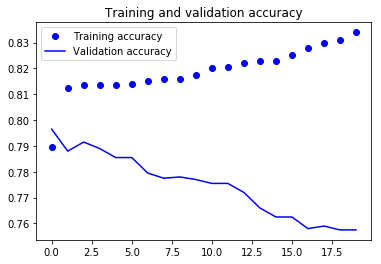

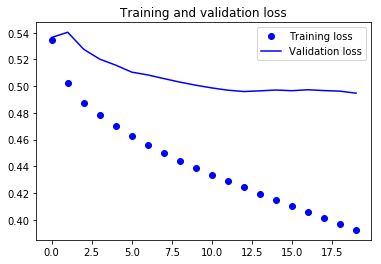

In [72]:

accur = history.history['acc']
val_accur = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.plot(epochs, accur, 'bo', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
def predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    return preds

In [75]:
benign_dir='/data/small/test/benign/'
malign_dir='/data/small/test/malign/'
#samples = [ISIC_0000014.jpg']
directory1 = curr_dir+benign_dir+'ISIC_0000014.jpg'
directory2 = curr_dir+malign_dir+'ISIC_0000002.jpg'
directory3 = curr_dir+malign_dir+'ISIC_0001102.jpg'

In [77]:
import time

In [79]:

t0 = time.time()
#model = load_model(path)
print('Generating predictions on image:', directory3)
preds = predict(directory3, model)
print(preds)
t1 = time.time()
#print('Loaded in:', t1-t0)

Generating predictions on image: /Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/test/malign/ISIC_0001102.jpg
[[0.43343204 0.5665679 ]]


In [80]:
t0 = time.time()
#model = load_model(path)
print('Generating predictions on image:', directory2)
preds = predict(directory2, model)
print(preds)
t1 = time.time()
#print('Loaded in:', t1-t0)

Generating predictions on image: /Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/test/malign/ISIC_0000002.jpg
[[0.50288576 0.49711427]]


In [81]:
t0 = time.time()
#model = load_model(path)
print('Generating predictions on image:', directory1)
preds = predict(directory1, model)
print(preds)
t1 = time.time()
#print('Loaded in:', t1-t0)

Generating predictions on image: /Users/Mihai/Documents/Project_5152cv/derma_diagnosis/data/small/test/benign/ISIC_0000014.jpg
[[0.4954535  0.50454646]]
